1、导入数据

In [1]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

print(os.listdir('../input'))

['new-york-city-taxi-fare-prediction']


In [2]:
train =  pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv', nrows = 10000)

test = pd.read_csv("../input/new-york-city-taxi-fare-prediction/test.csv")

2、查看数据基本情况

In [3]:
train.shape

(10000, 8)

In [4]:
test.shape

(9914, 7)

训练集有100万行数据，8个字段。预测集有9914行数据，7个字段。

In [5]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


训练集train的描述性分析

In [6]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992059,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [7]:
train.isnull().sum().sort_values(ascending=False)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
test.isnull().sum().sort_values(ascending=False)

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
train = train.drop(train[train['dropoff_latitude'].isnull()].index,axis=0) #删除10条含缺失值的数据

In [10]:
train = train.drop(train[train['fare_amount']<0].index,axis=0)
train['fare_amount'].describe()

count    9998.000000
mean       11.238252
std         9.583189
min         0.010000
25%         6.000000
50%         8.500000
75%        12.500000
max       180.000000
Name: fare_amount, dtype: float64

In [11]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [12]:
train = train.drop(train[train['passenger_count']>6].index,axis=0)
train['passenger_count'].describe()

count    9998.000000
mean        1.644829
std         1.271324
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [13]:
train['pickup_latitude'].describe()

count    9998.000000
mean       39.920296
std         7.319656
min       -74.006893
25%        40.734564
50%        40.752695
75%        40.767696
max       401.083332
Name: pickup_latitude, dtype: float64

In [14]:
train['pickup_longitude'].describe()

count    9998.000000
mean      -72.466375
std        10.610771
min       -74.438233
25%       -73.992056
50%       -73.981758
75%       -73.966934
max        40.766125
Name: pickup_longitude, dtype: float64

In [15]:
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90]))
         .index,axis=0)
train = train.drop(((train[train['pickup_longitude']<-180])|(train[train['pickup_longitude']>180]))
         .index,axis=0)
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90]))
         .index,axis=0)
train = train.drop(((train[train['dropoff_longitude']<-180])|(train[train['dropoff_longitude']>180])
         ).index,axis=0)
train.shape

(9997, 8)

In [16]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [17]:
train['key']=pd.to_datetime(train['key'])
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'])
test['key']=pd.to_datetime(test['key'])
test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'])

In [18]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [19]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [20]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [21]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [22]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
5,2011-01-06 09:50:45.000000200,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,3.787239
6,2012-11-20 20:35:00.000000100,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,1.555807
7,2012-01-04 17:22:00.000000810,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,4.155444
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,1.253232
9,2009-09-02 01:11:00.000000830,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2.849627


In [23]:
test.head(10)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5.387301
5,2012-12-01 21:12:12.000000500,2012-12-01 21:12:12+00:00,-73.960983,40.765547,-73.979177,40.740053,1,3.222549
6,2011-10-06 12:10:20.000000100,2011-10-06 12:10:20+00:00,-73.949013,40.773204,-73.959622,40.770893,1,0.929601
7,2011-10-06 12:10:20.000000300,2011-10-06 12:10:20+00:00,-73.777282,40.646636,-73.985083,40.759368,1,21.540102
8,2011-10-06 12:10:20.000000200,2011-10-06 12:10:20+00:00,-74.014099,40.709638,-73.995106,40.741365,1,3.873962
9,2014-02-18 15:22:20.000000200,2014-02-18 15:22:20+00:00,-73.969582,40.765519,-73.980686,40.770725,1,1.099794


In [24]:
train['H_Distance'].describe()

count    9997.000000
mean       12.714536
std       275.747918
min         0.000000
25%         1.206518
50%         2.120232
75%         3.874790
max      8667.542104
Name: H_Distance, dtype: float64

In [25]:
train.loc[((train['pickup_latitude']==0)&(train['pickup_longitude']==0))&((train['dropoff_latitude']
          !=0) & (train['dropoff_longitude']!=0))& (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance


In [26]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))
&((train['dropoff_latitude']!=0)& (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [27]:
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))
&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0))&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance


In [28]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))
&((train['dropoff_latitude']==0)&(train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [29]:
train = train.drop(train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)].index,axis=0)

In [30]:
train.loc[(train['H_Distance']==0) & (train['fare_amount'] < 2.5)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance


In [31]:
train = train.drop(train.loc[(train['H_Distance']==0) & (train['fare_amount'] < 2.5)].index,axis=0)

In [32]:
F3h0 = train.loc[(train['fare_amount']>3)&(train['H_Distance']==0)]

In [33]:
F3h0['H_Distance'] = F3h0.apply(lambda row: ((row['fare_amount']-2.50)/1.56), axis=1)
train.update(F3h0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
#用公式计算车费
#H1f0 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]
#H1f0['fare_amount'] = H1f0.apply(lambda row: (row['H_Distance']*1.56+2.5),axis=1)
#train.update(H1f0)

In [35]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [36]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010,3,9,1,7


In [37]:
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

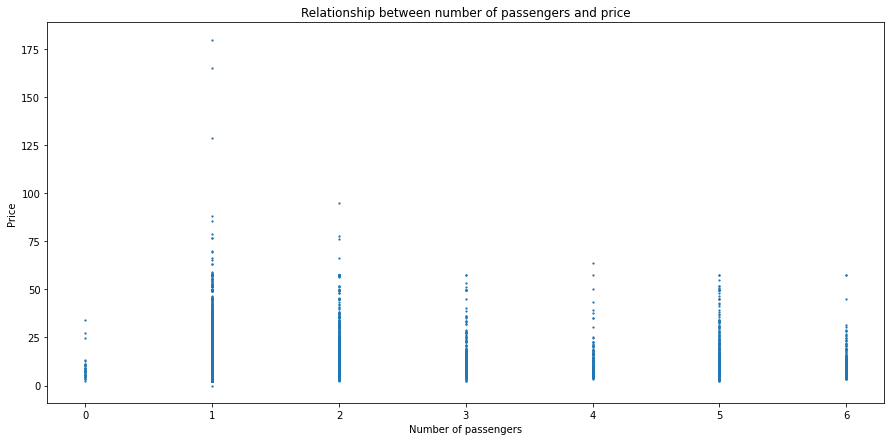

In [38]:
#导入包
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'],y=train['fare_amount'],s=1.5)
plt.title('Relationship between number of passengers and price')
plt.xlabel('Number of passengers')
plt.ylabel('Price')
plt.show()

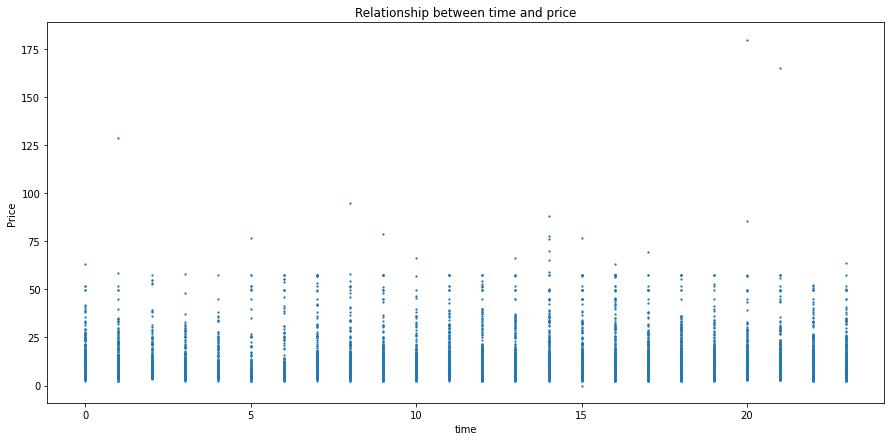

In [39]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'],y=train['fare_amount'],s=1.5)
plt.title('Relationship between time and price')
plt.xlabel('time')
plt.ylabel('Price')
plt.show()

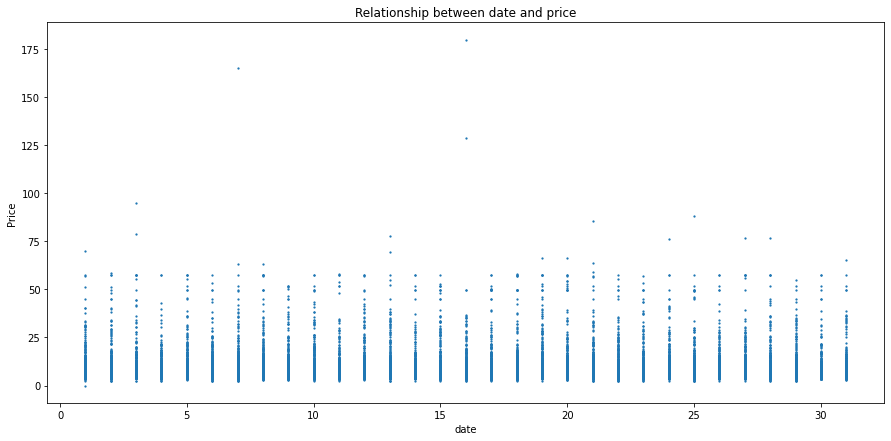

In [40]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'],y=train['fare_amount'],s=1.5)
plt.title('Relationship between date and price')
plt.xlabel('date')
plt.ylabel('Price')
plt.show()

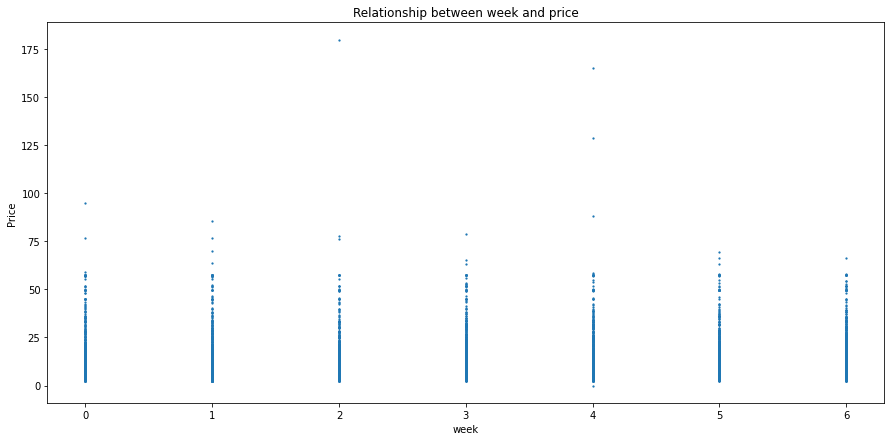

In [41]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of week'],y=train['fare_amount'],s=1.5)
plt.title('Relationship between week and price')
plt.xlabel('week')
plt.ylabel('Price')
plt.show()

In [42]:
x_train = train.iloc[:,train.columns!='fare_amount'] #测试集 x
y_train = train['fare_amount'].values #测试集 y
x_test = test #预测数据

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [44]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
rf_predict = rf.predict(x_test)
rf_predict

array([10.275 ,  9.656 ,  4.327 , ..., 52.8142, 22.8883,  7.821 ])

In [46]:
submission = pd.read_csv('../input/new-york-city-taxi-fare-prediction/sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('./submission_1.csv', index=False)